# Лабораторная работа №1
# Разведочный анализ данных. Исследование и визуализация данных

### Цель лабораторной работы
Bзучение различных методов визуализация данных.

### Задание
- Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
- Для первой лабораторной работы рекомендуется использовать датасет без пропусков в данных, например из Scikit-learn. Пример преобразования датасетов Scikit-learn в Pandas Dataframe можно посмотреть здесь.
- Для лабораторных работ не рекомендуется выбирать датасеты большого размера.
- Создать ноутбук, который содержит следующие разделы:
    - Текстовое описание выбранного Вами набора данных.
    - Основные характеристики датасета.
    - Визуальное исследование датасета.
    - Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на github.

# 1) Текстовое описание набора данных
В качестве набора данных будем использовать датасет из Scikit-learn:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

Данный датасет содержит данные о пациентах, больных диабетом. 
Анализ этих данных позволит выявить показатель прогрессирования заболевания через год после исходного уровня.

Таблица с данными содержит следующие колонки:

1) Age - возраст

2) Sex - пол

3) Body mass index - индекс массы тела

4) Average blood pressure - среднее артериальное давление

5) S1 ...

6) S2 ...

7) S3 ...

8) S4 ...

9) S5 ...

10) S6 - шесть измерений сыворотки крови

11) target - целевой признак, т.е. количественный показатель прогрессирования заболевания через год после исходного уровня.


# Импорт библиотек

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.datasets import *

# Загрузка данных

In [10]:
diabetes = load_diabetes()

In [12]:
for x in diabetes:
    print(x)

data
target
DESCR
feature_names
data_filename
target_filename


In [15]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# Преобразование в Pandas DataFrame

In [16]:
data1 = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

In [17]:
data1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# 2) Основные характеристики датасета

In [18]:
#первые 5 строк
data1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [19]:
#размер датасета - 442 строки, 11 колонок
data1.shape

(442, 11)

In [20]:
total_count = data1.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 442


In [21]:
# Список колонок
data1.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [22]:
# Список колонок с типами данных
data1.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [24]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data1.columns:
    # Количество пустых значений - все значения заполнены
    null_count = data1[data1[col].isnull()].shape[0]
    print('{} - {}'.format(col, null_count))

age - 0
sex - 0
bmi - 0
bp - 0
s1 - 0
s2 - 0
s3 - 0
s4 - 0
s5 - 0
s6 - 0
target - 0


In [25]:
# Основные статистические характеристки набора данных
data1.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [26]:
# Определим уникальные значения для целевого признака
# target - количественная мера прогрессирования заболевания через год после исходного уровня
data1['target'].unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

# 3) Визуальное исследование датасета
Для визуального исследования построим некоторые варианты диаграмм, которые используются достаточно часто.

# Диаграмма рассеяния
Диаграмма рассеяния позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены.

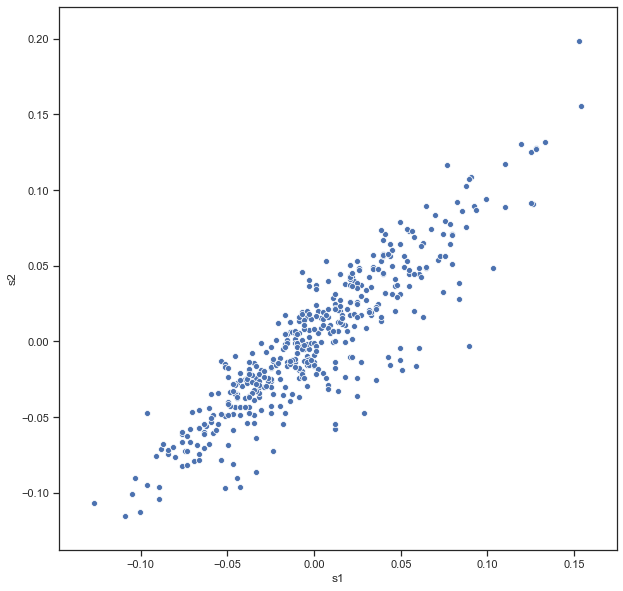

In [43]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='s1', y='s2', data=data1)

Можно видеть что между полями s1 и s2 пристутствует почти линейная зависимость.
Посмотрим насколько на эту зависимость влияет целевой признак.

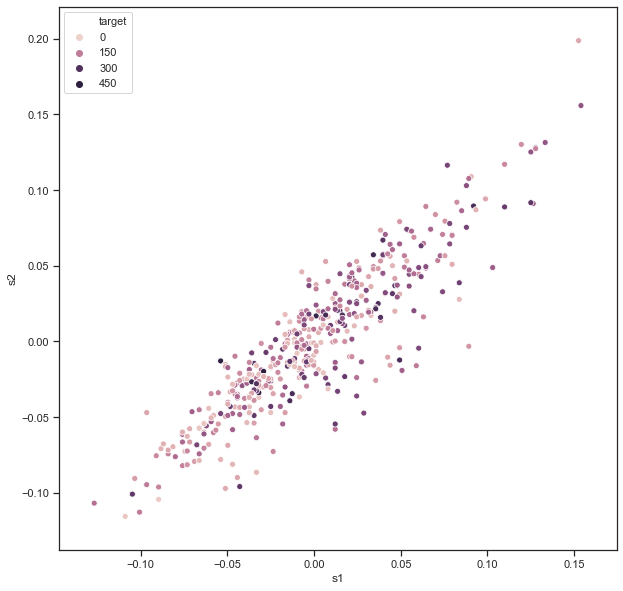

In [44]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='s1', y='s2', data=data1, hue='target')

# Гистограмма
Гистограмма позволяет оценить плотность вероятности распределения данных.

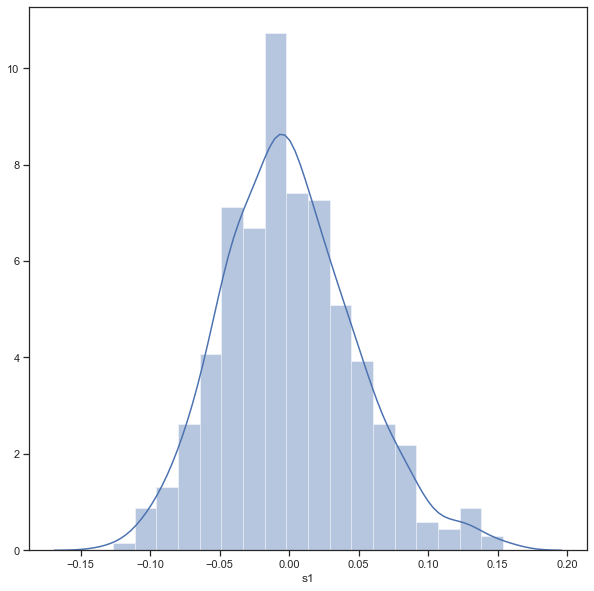

In [51]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data1['s1'])

# Jointplot
Jointplot - комбинация гистограмм и диаграмм рассеивания.

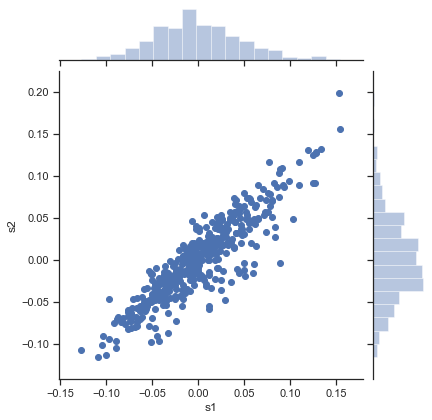

In [52]:
sns.jointplot(x='s1', y='s2', data=data1)

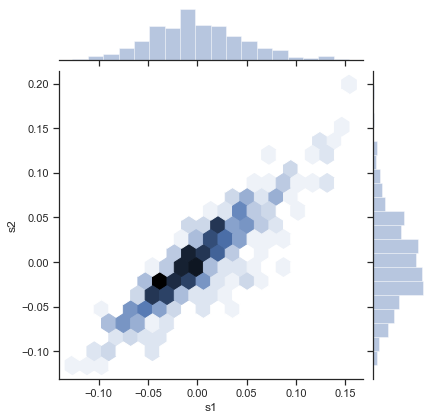

In [53]:
sns.jointplot(x='s1', y='s2', data=data1, kind="hex")

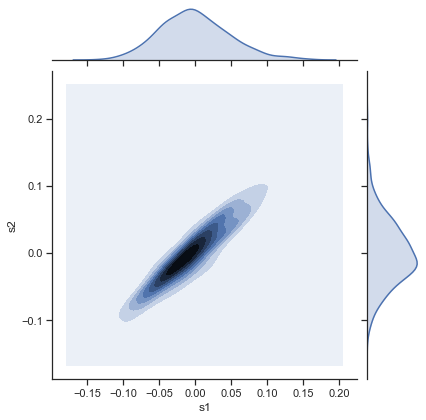

In [54]:
sns.jointplot(x='s1', y='s2', data=data1, kind="kde")

# Парные диаграммы
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

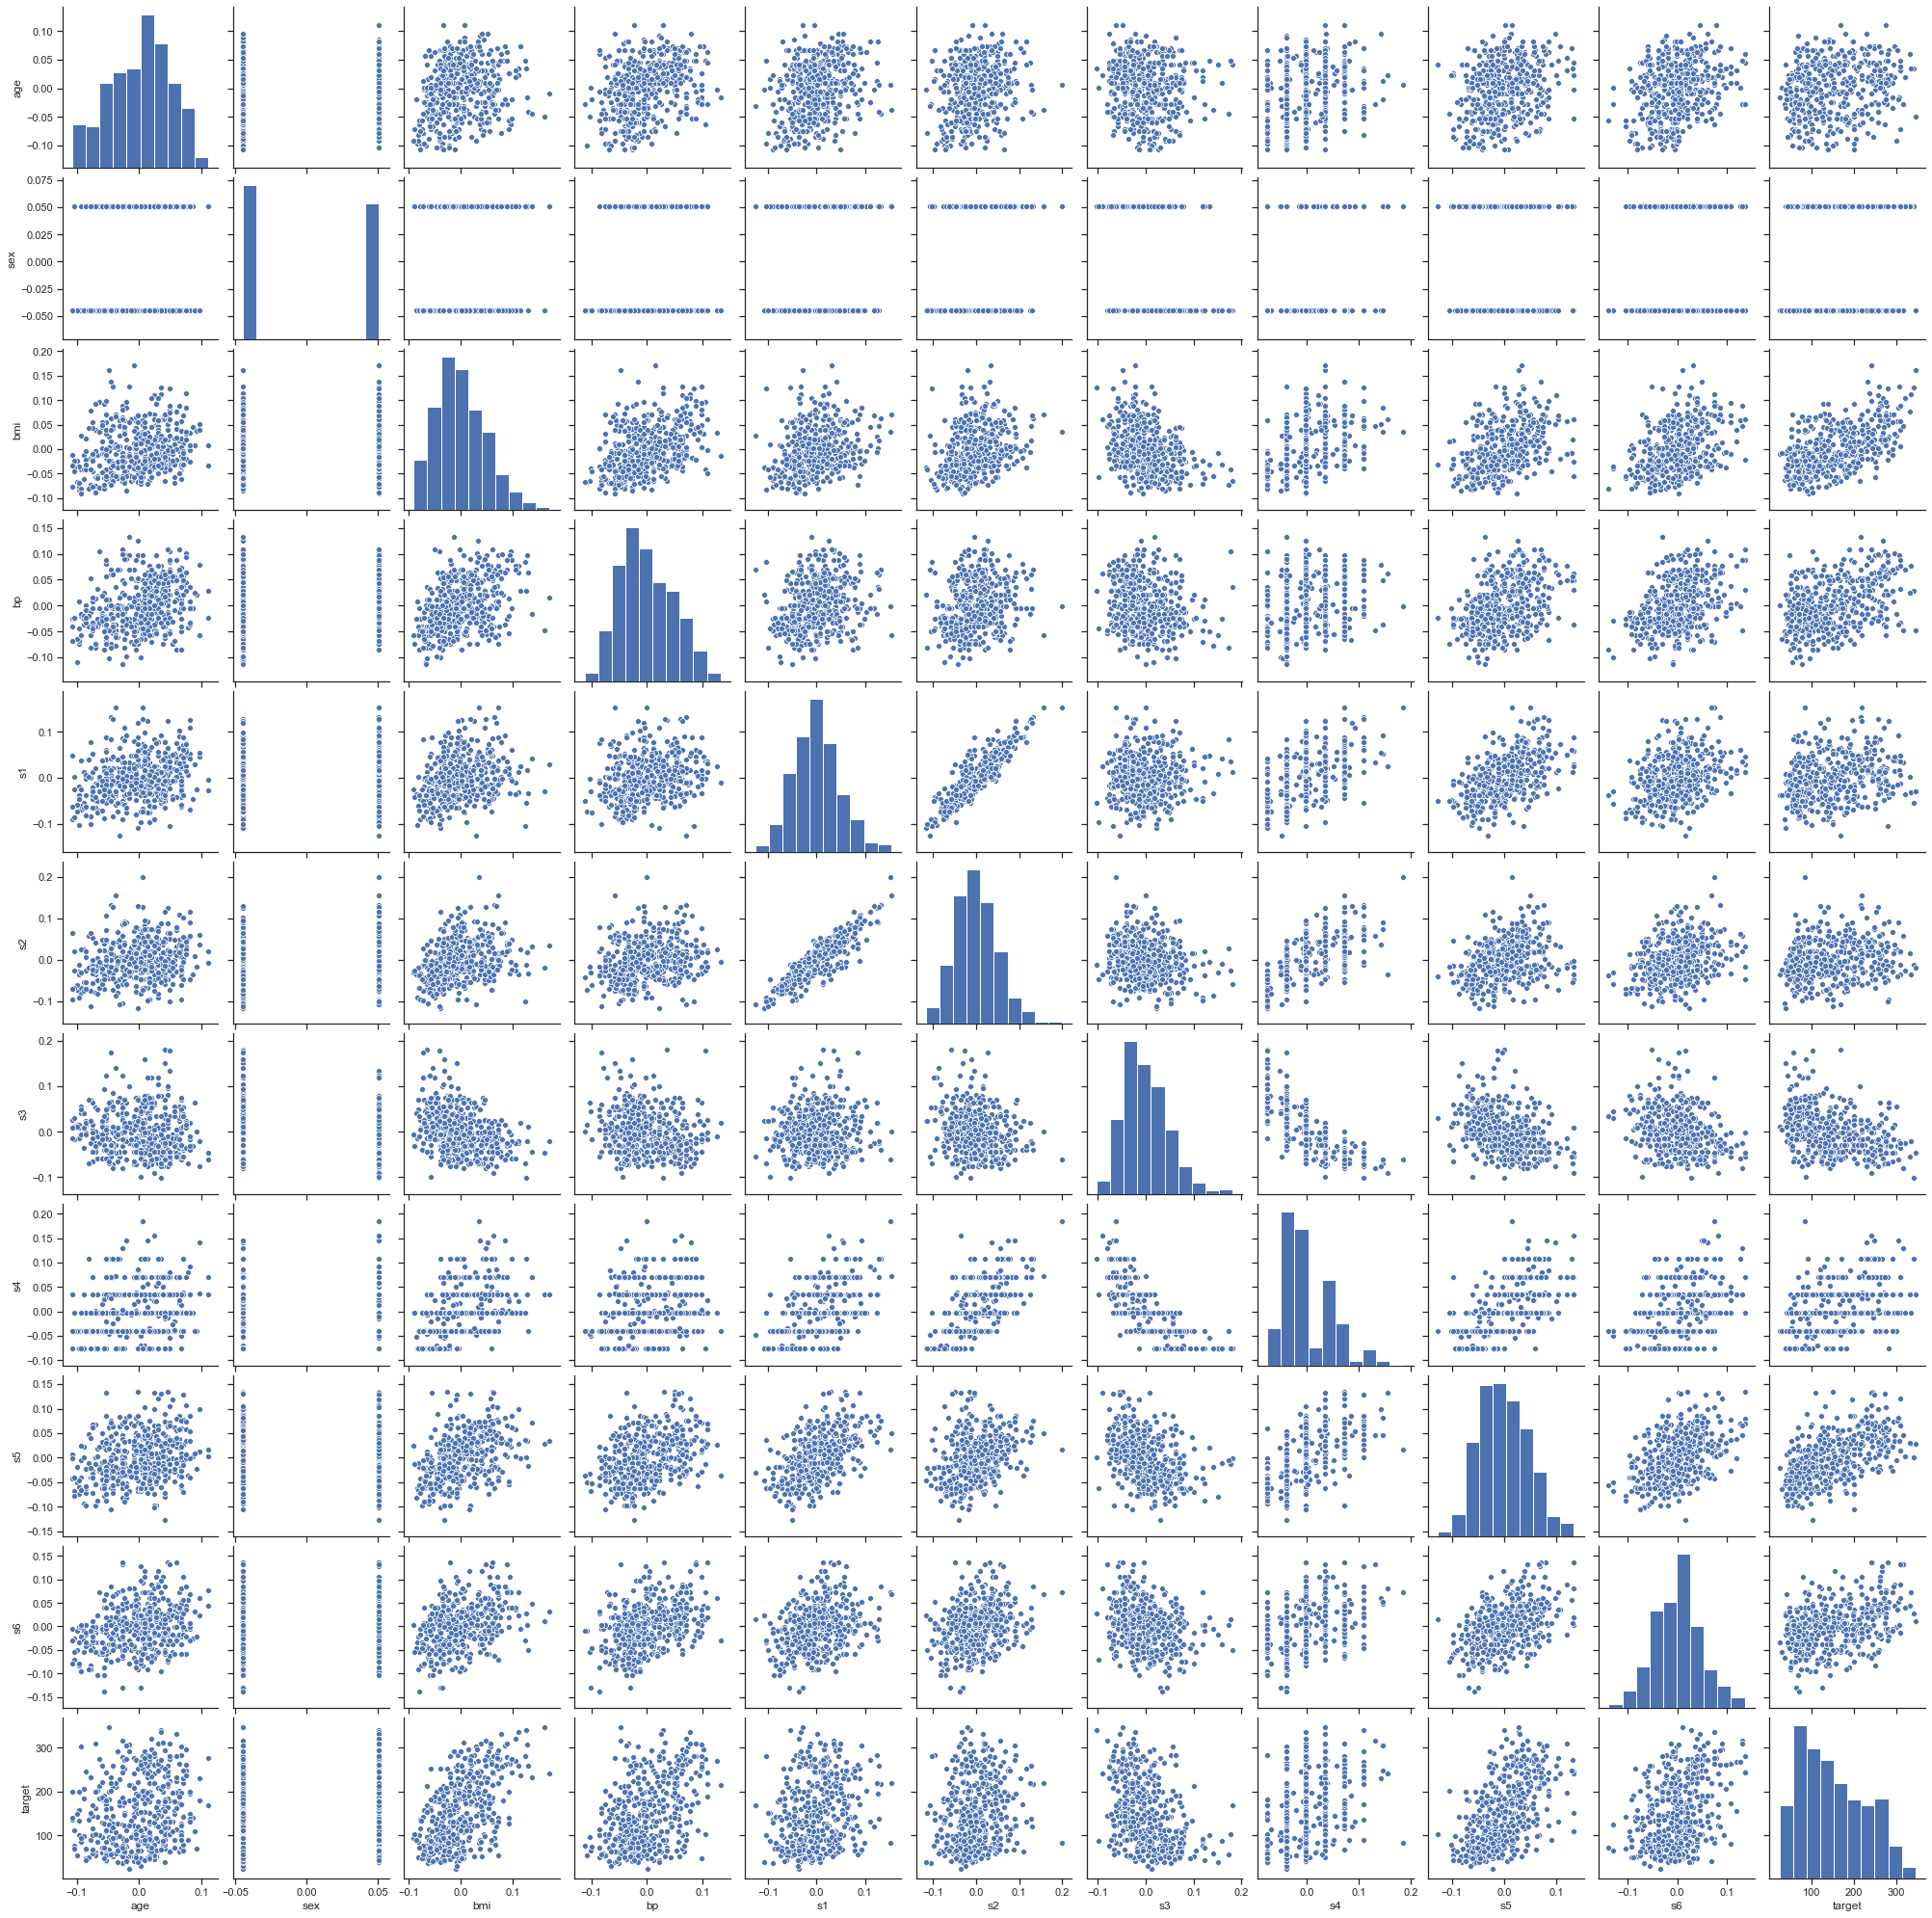

In [56]:
sns.pairplot(data1)

d:\python3_7_4\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
d:\python3_7_4\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
d:\python3_7_4\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
d:\python3_7_4\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
d:\python3_7_4\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
d:\python3_7_4\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  

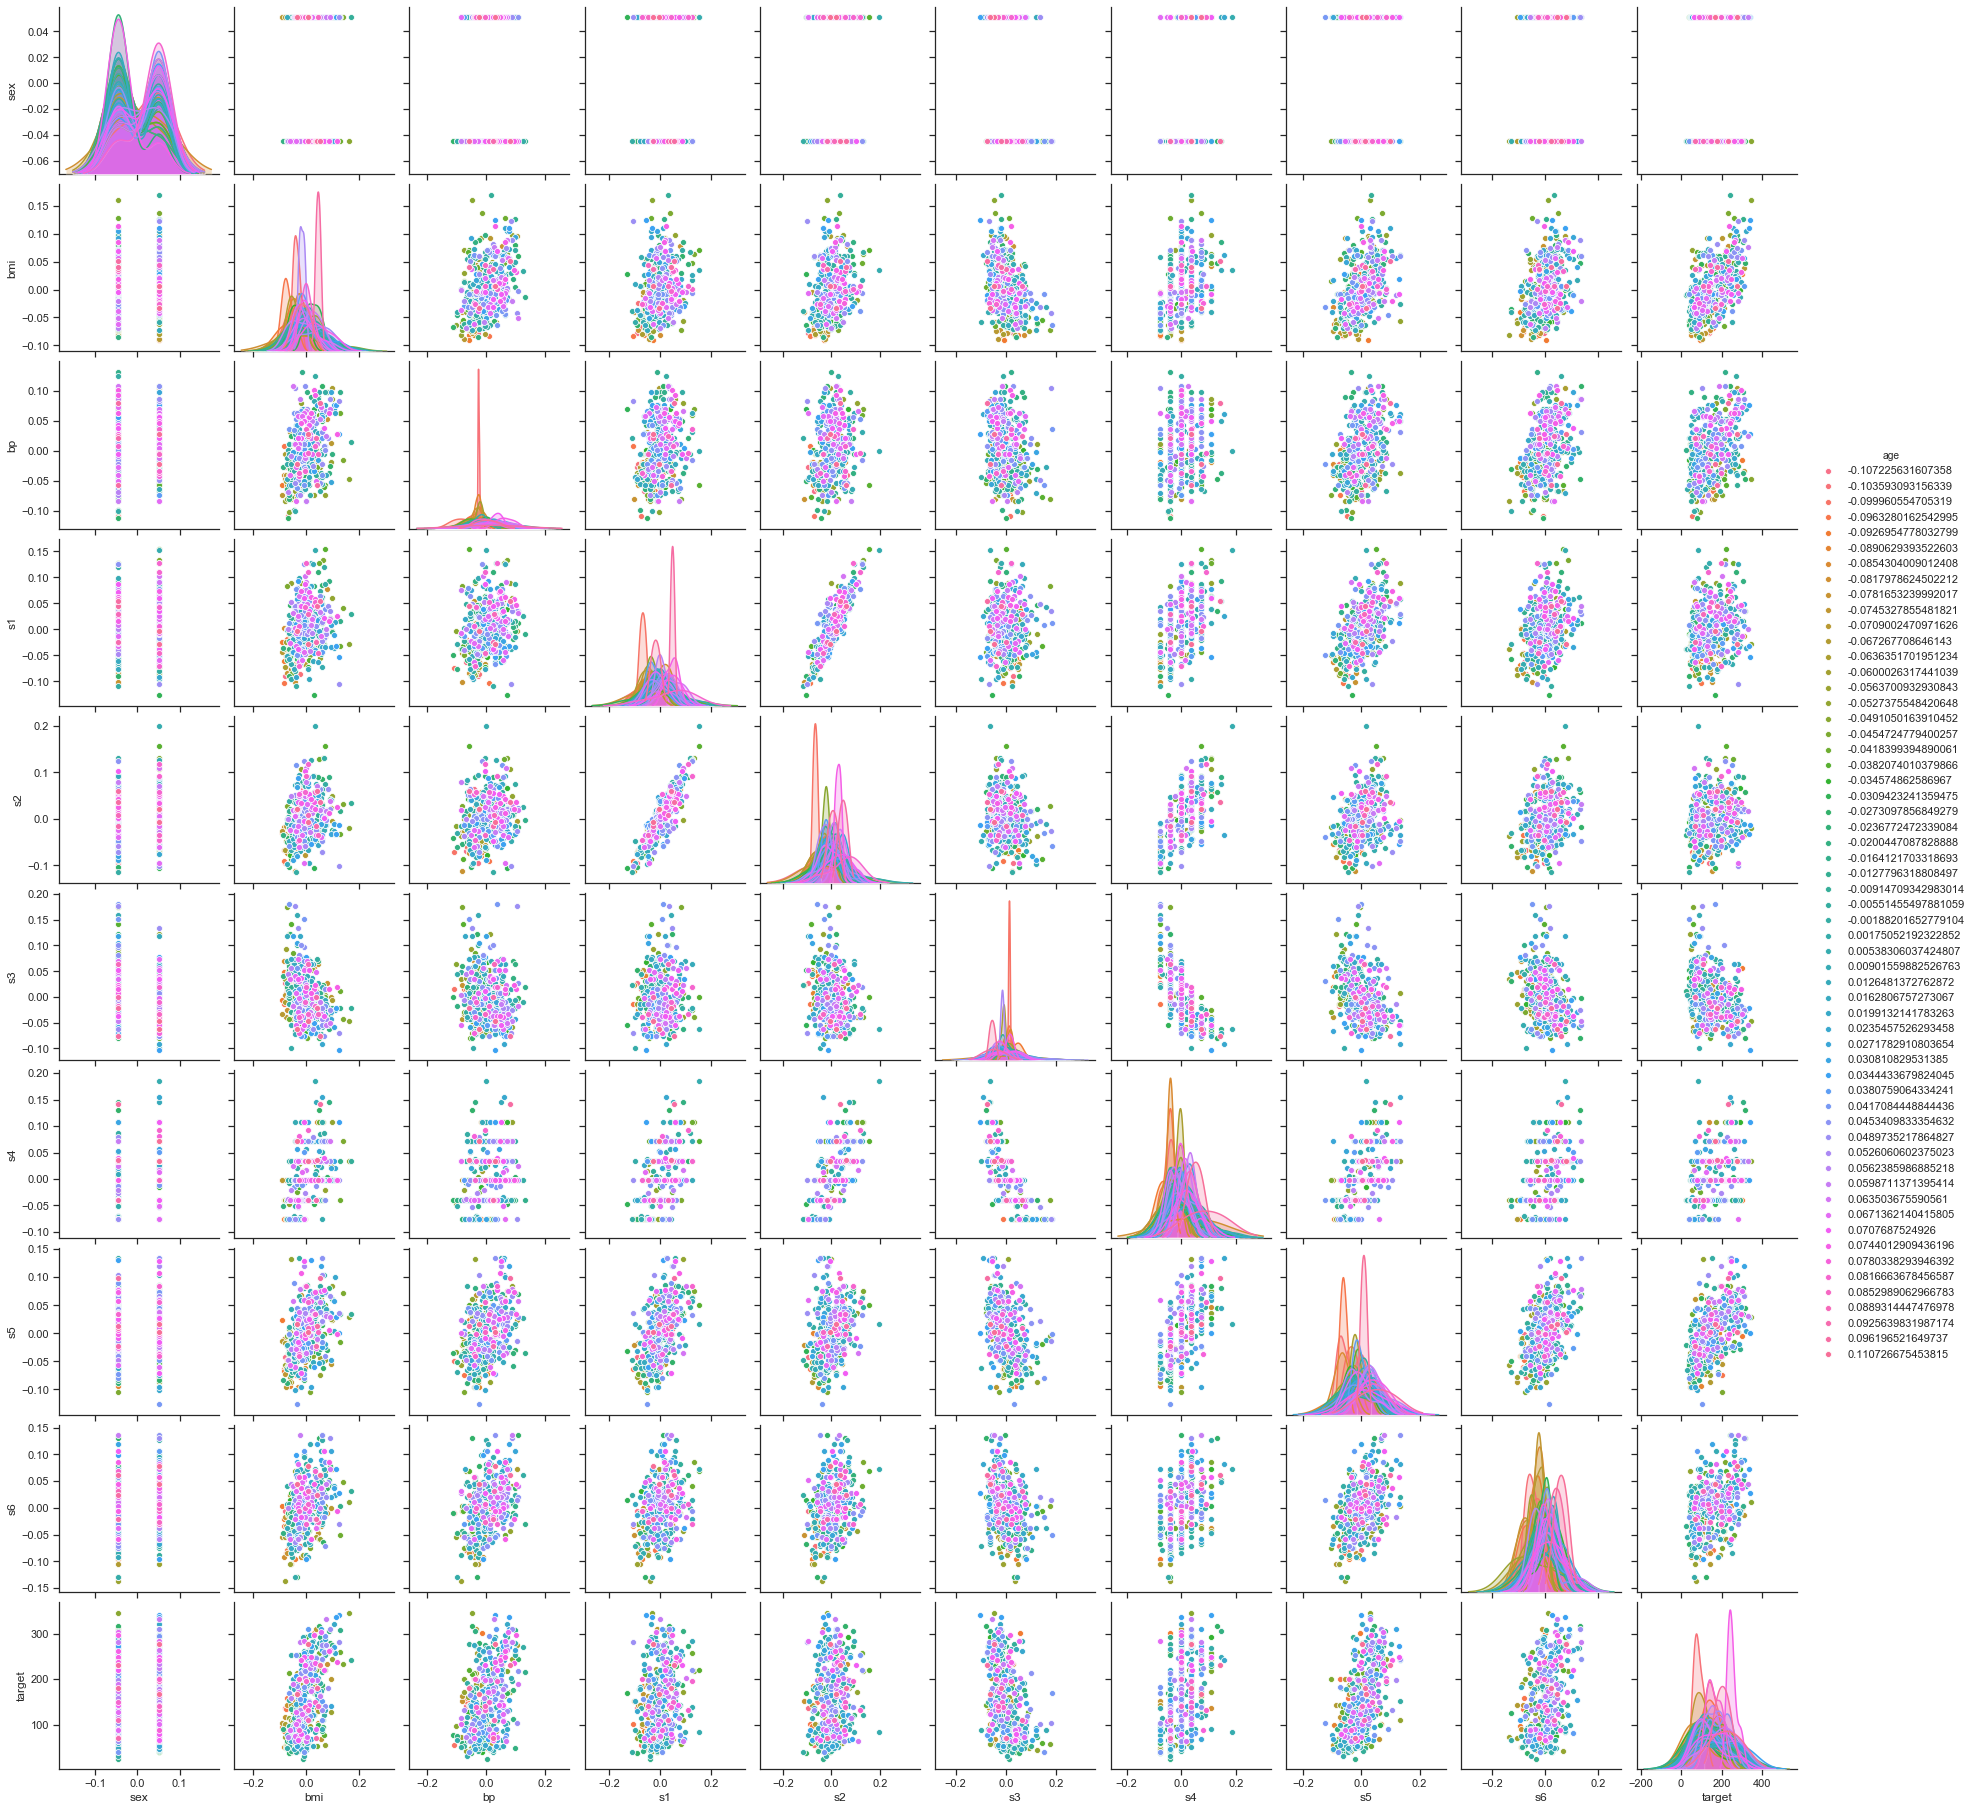

In [60]:
sns.pairplot(data1, hue="age")

# Ящик с усами
Ящик с усами отображает одномерное распределение вероятности.

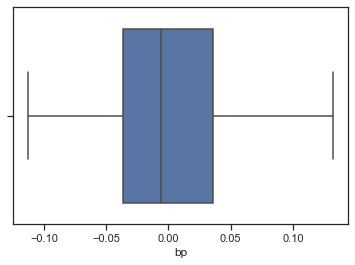

In [63]:
sns.boxplot(x=data1['bp'])

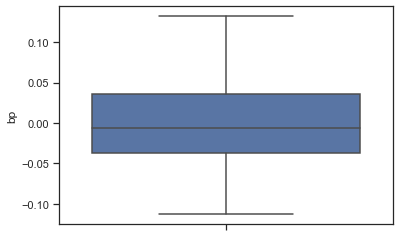

In [64]:
# По вертикали
sns.boxplot(y=data1['bp'])

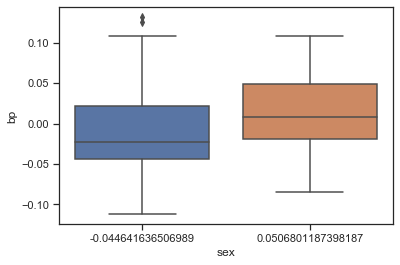

In [68]:
# Распределение параметра pb сгруппированные по sex.
sns.boxplot(x='sex', y='bp', data=data1)

# Violin plot

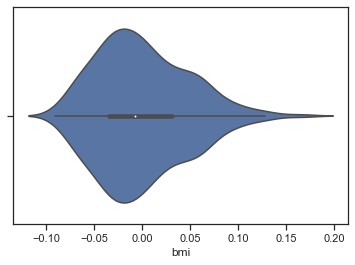

In [74]:
sns.violinplot(x=data1['bmi'])

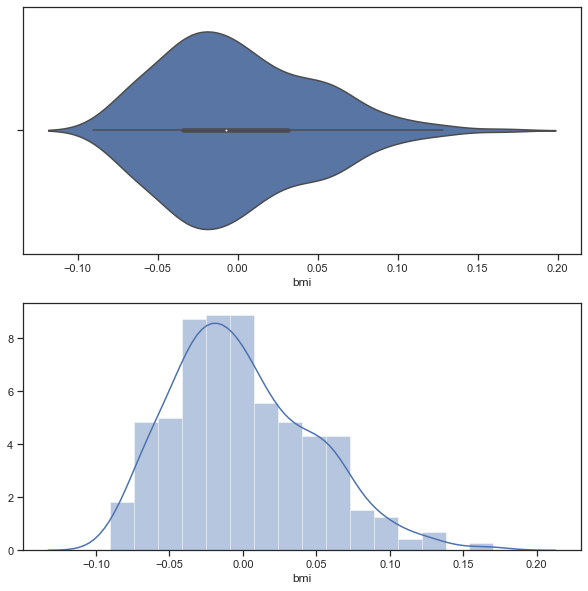

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data1['bmi'])
sns.distplot(data1['bmi'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

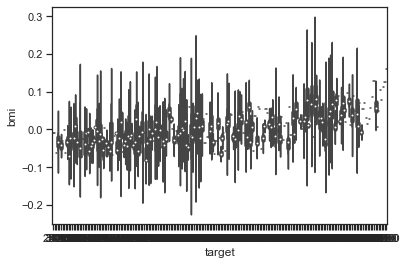

In [80]:
# Распределение параметра bmi сгруппированные по target.
sns.violinplot(x='target', y='bmi', data=data1)

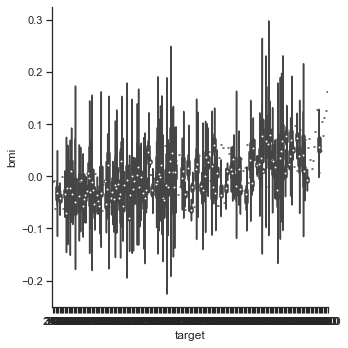

In [81]:
sns.catplot(y='bmi', x='target', data=data1, kind="violin", split=True)

# 4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [83]:
data1.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


На основе корреляционной матрицы можно сделать следующие выводы:

1) Целевой признак наиболее сильно коррелирует с bmi (индекс массы тела) и s5 (одно из измерений сыворотки крови). Эти признаки обязательно следует оставить в модели.

2) Целевой признак отчасти коррелирует с bp (артериальное давление), s4 , s6 (измерения сыворотки крови). Эти признаки стоит также оставить в модели.

3) Целевой признак слабо коррелирует с age (возраст), sex (пол), s1, s2, s3 (измерения сыворотки крови). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

4) s1 и s2 очень сильно коррелируют между собой (0.896663). Поэтому из этих признаков в модели можно оставлять только один.

5) Также можно сделать вывод, что выбирая из признаков s1 и s2 лучше выбрать s1, потому что он сильнее коррелирован с целевым признаком. Но для этой пары признаков этот вывод нельзя считать надежным, потому что и 0.21 и 0.17 являются довольно малыми величинами.

Построим корреляционную матрицу на основе коэффициентов корреляции Пирсона (используется по умолчанию), Кендалла и Спирмена:

In [87]:
data1.corr(method='pearson')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [88]:
data1.corr(method='kendall')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.146580,0.136535,0.242111,0.182220,0.153612,-0.073846,0.160898,0.180544,0.201784,0.130709
sex,0.146580,1.000000,0.080424,0.215733,0.022809,0.110208,-0.326188,0.297335,0.143172,0.168199,0.030630
bmi,0.136535,0.080424,1.000000,0.281770,0.194171,0.198583,-0.249831,0.335625,0.344720,0.266373,0.391195
bp,0.242111,0.215733,0.281770,1.000000,0.188067,0.140253,-0.131014,0.205948,0.268863,0.264566,0.289352
s1,0.182220,0.022809,0.194171,0.188067,1.000000,0.717229,0.010695,0.393367,0.356268,0.227139,0.154016
s2,0.153612,0.110208,0.198583,0.140253,0.717229,1.000000,-0.133332,0.503579,0.242250,0.194082,0.129665
s3,-0.073846,-0.326188,-0.249831,-0.131014,0.010695,-0.133332,1.000000,-0.638633,-0.311775,-0.200545,-0.278884
s4,0.160898,0.297335,0.335625,0.205948,0.393367,0.503579,-0.638633,1.000000,0.485410,0.307397,0.324734
s5,0.180544,0.143172,0.344720,0.268863,0.356268,0.242250,-0.311775,0.485410,1.000000,0.316235,0.408988
s6,0.201784,0.168199,0.266373,0.264566,0.227139,0.194082,-0.200545,0.307397,0.316235,1.000000,0.239051


In [89]:
data1.corr(method='spearman')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235,0.197822
sex,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277,0.037401
bmi,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664,0.561382
bp,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219,0.416241
s1,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173,0.232429
s2,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483,0.195834
s3,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863,-0.410022
s4,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700,0.448931
s5,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023,0.589416
s6,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000,0.350792


Как видно, на практике три метода редко дают значимые различия.

Для визуализации корреляционной матрицы используем "тепловую карту" heatmap, которая показывает степень корреляции различными цветами.

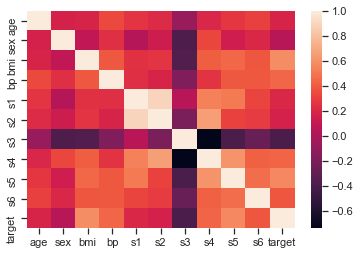

In [91]:
sns.heatmap(data1.corr())

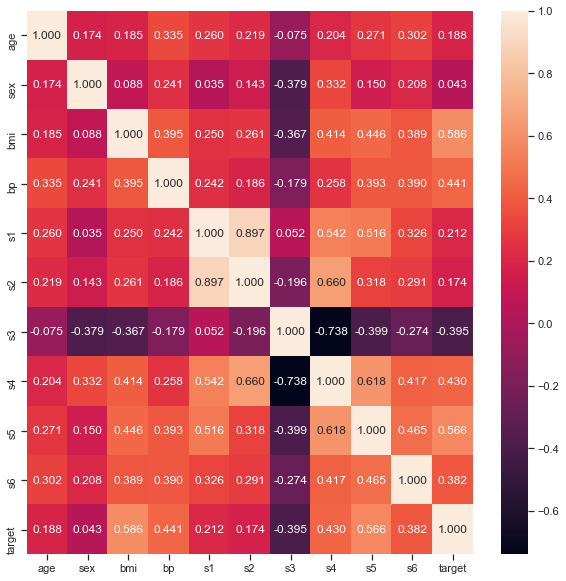

In [105]:
# Вывод значений в ячейках
#sns.heatmap(data1.corr(), annot=True, fmt='.1f')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True, fmt='.3f')

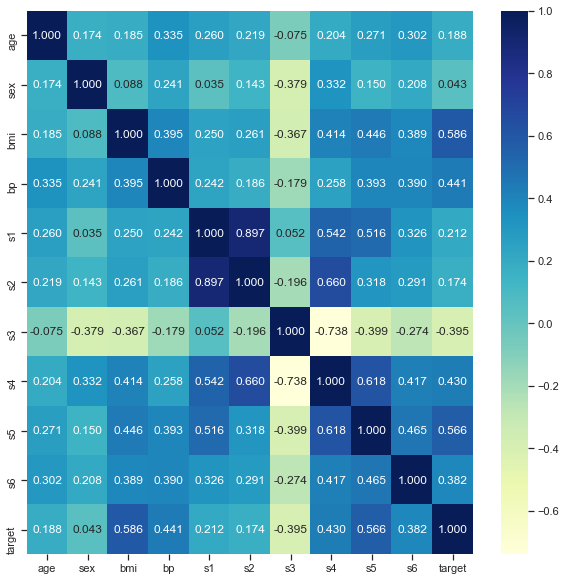

In [107]:
# Изменение цветовой гаммы
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data1.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

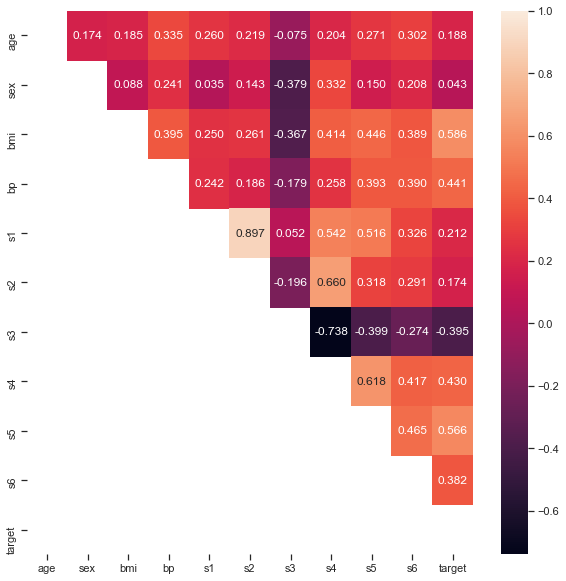

In [109]:
# Треугольный вариант матрицы
mask = np.zeros_like(data1.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data1.corr(), mask=mask, annot=True, fmt='.3f')

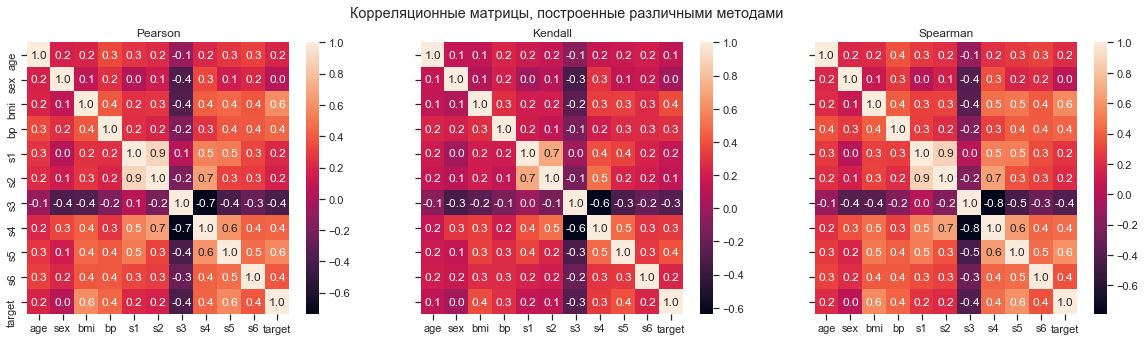

In [101]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20,5))
sns.heatmap(data1.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(data1.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(data1.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')